In [1]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
globalstart = datetime.now()

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')

In [4]:
import os
if not os.path.isfile('train.csv'):
    # Create a file 'train.csv' before reading it
    # Read all the files in netflix and store them in one big file('train.csv')
    # We re reading from each of the four files and appendig each rating to a global file 'train.csv'
    train = open('train.csv', mode='a')

    row = list()
    files=['netflix/combined_data_1.txt','netflix/combined_data_2.txt', 
           'netflix/combined_data_3.txt', 'netflix/combined_data_4.txt']
    for file in files:
        with open(file) as f:
            for line in f: 
                del row[:] # you don't have to do this.
                line = line.strip()
                if line.endswith(':'):
                    # All below are ratings for this movie, until another movie appears.
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    train.write(','.join(row))
                    train.write('\n')
    train.close()

___Before Reading train.csv : ___ 
- There are some duplicates in our dataflie (__around 700__).
    - Not so many.. in 100M ratings.., but duplicates are duplicates.


- You might have to write ADDITIONAL CODE to remove that errors in original file to remove those duplicate entries
    - (___You can even run with duplicates also.. It won't effect much___)


- The file that is present in disk is __free from duplicates__

In [5]:
# Now, we have train.csv in the dsik. Just read from it.
 #############(movie, user, rating, date)######
train_df = pd.read_csv('train.csv', sep=',', 
                       names=['movie', 'user','rating','date'],
                      parse_dates=['date'], index_col='date')
train_df.head()
    

,movie,user,rating
date,,,
2005-09-06,1,1488844,3.0
2005-05-13,1,822109,5.0
2005-10-19,1,885013,4.0
2005-12-26,1,30878,4.0
2004-05-03,1,823519,3.0


## Is there any rating that has incorrect entry...?  

In [6]:
sum(train_df.rating > 5.0)

0

## No. of Ratings, Users and Movies 

In [7]:
movies = train_df.movie.value_counts().sort_index()
users = train_df.user.value_counts().sort_index()
ratings = train_df.rating

print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))


Total no of ratings : 100479540
Total No of Users   : 480189
Total No of movies  : 17770


In [8]:
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

<IPython.core.display.Javascript object>


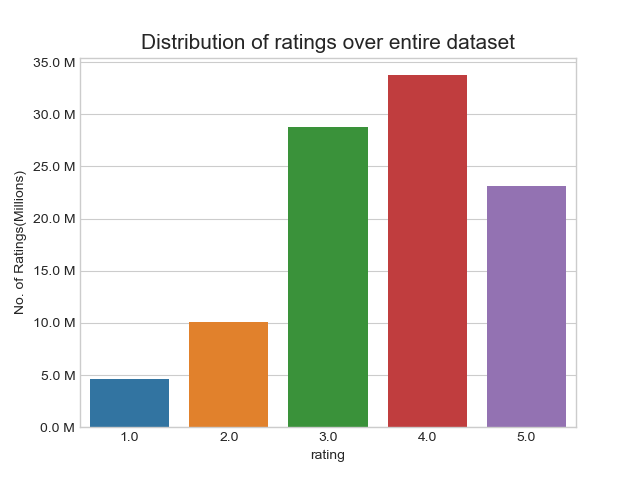

In [9]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over entire dataset', fontsize=15)
sns.countplot(train_df.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

### Add new columns to the data set year, month and week day for analysis.

In [10]:
train_df['year']  = train_df.index.year
train_df['month'] = train_df.index.month
train_df['day_of_week'] = train_df.index.weekday_name

In [11]:
train_df.head()

,movie,user,rating,year,month,day_of_week
date,,,,,,
2005-09-06,1,1488844,3.0,2005,9,Tuesday
2005-05-13,1,822109,5.0,2005,5,Friday
2005-10-19,1,885013,4.0,2005,10,Wednesday
2005-12-26,1,30878,4.0,2005,12,Monday
2004-05-03,1,823519,3.0,2004,5,Monday


<IPython.core.display.Javascript object>


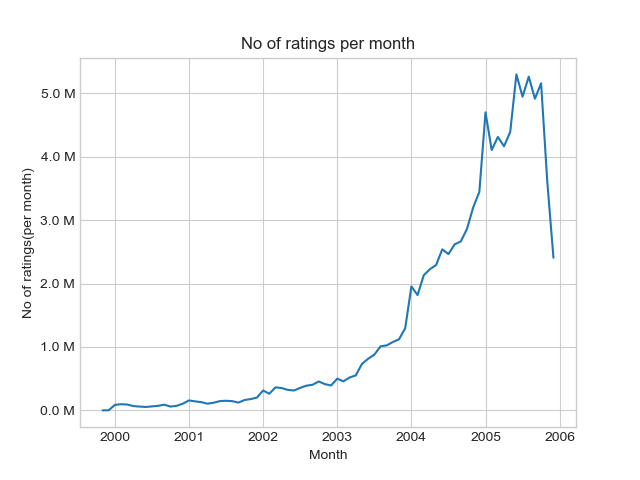

In [12]:
ax = train_df.resample('m')['rating'].count().plot()
ax.set_title('No of ratings per month')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

In [13]:
temp_df = train_df[train_df.movie==15].groupby(['rating'])['user'].count()

In [14]:
temp_df.head()

rating
1.0    30
2.0    35
3.0    88
4.0    96
5.0    41
Name: user, dtype: int64

<IPython.core.display.Javascript object>


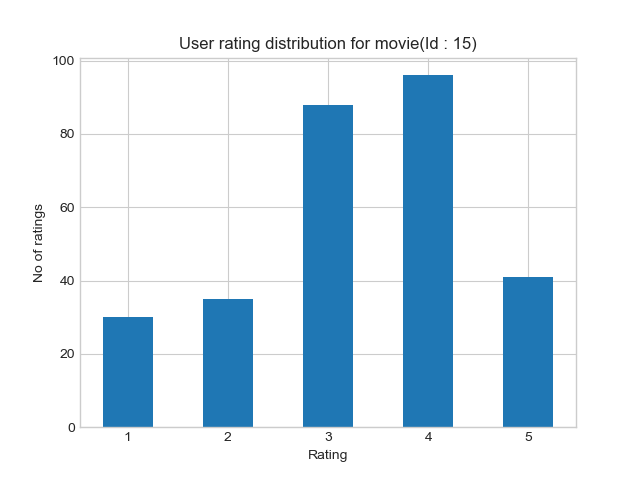

In [15]:
plt.bar(temp_df.index, temp_df.values,width=0.5)
plt.title('User rating distribution for movie(Id : 15)')
plt.xlabel('Rating')
plt.ylabel('No of ratings')
plt.show()

<IPython.core.display.Javascript object>


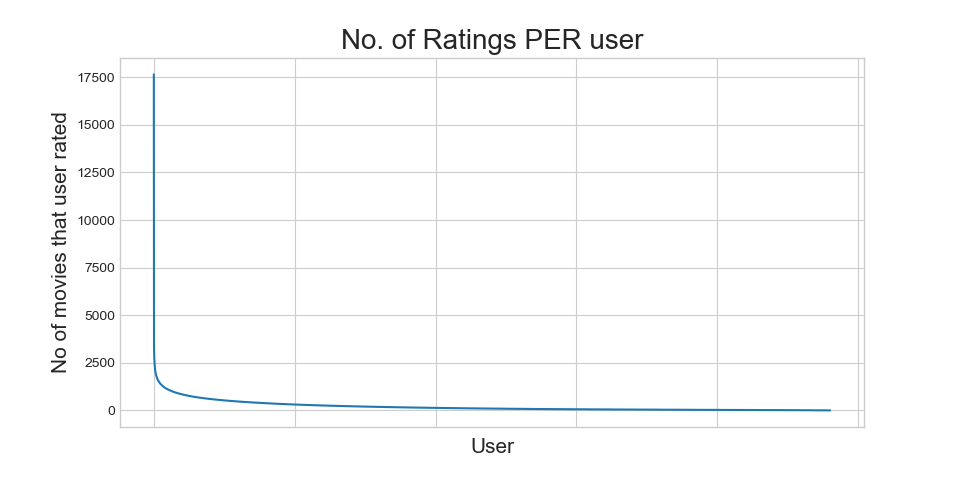

In [16]:
no_of_rated_movies_per_user = train_df.groupby(by='user')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()

plt.plot(no_of_rated_movies_per_user.values)
plt.title('No. of Ratings PER user', fontsize=20)
plt.xlabel('User', fontsize=15)
plt.ylabel('No of movies that user rated', fontsize=15)
ax.set_xticklabels([])

plt.show()

<IPython.core.display.Javascript object>


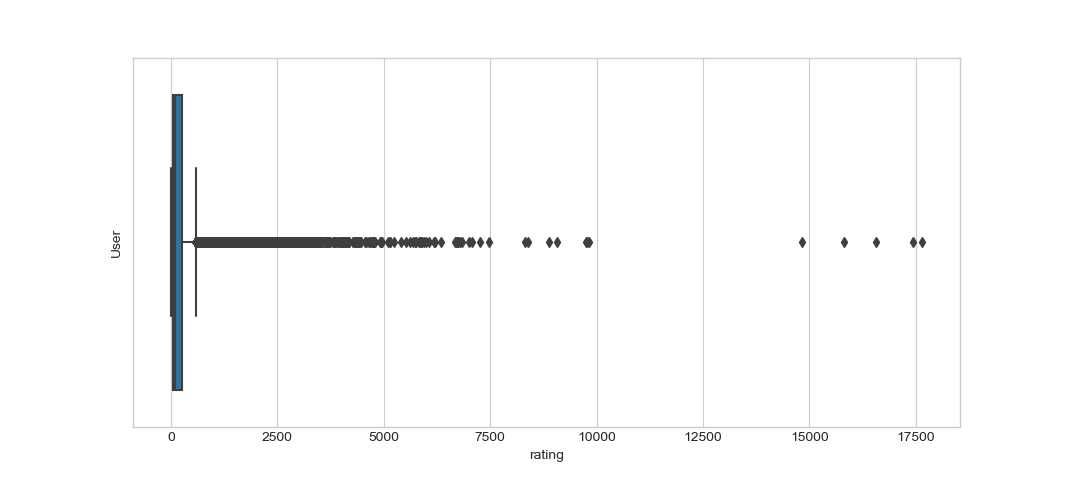

In [17]:
fig = plt.figure(figsize=plt.figaspect(.45))
ax = plt.gca()
plt.title("")
plt.xlabel("No of ratings by User")
plt.ylabel("User")
sns.boxplot(x=no_of_rated_movies_per_user, ax=ax)
plt.show()

<IPython.core.display.Javascript object>


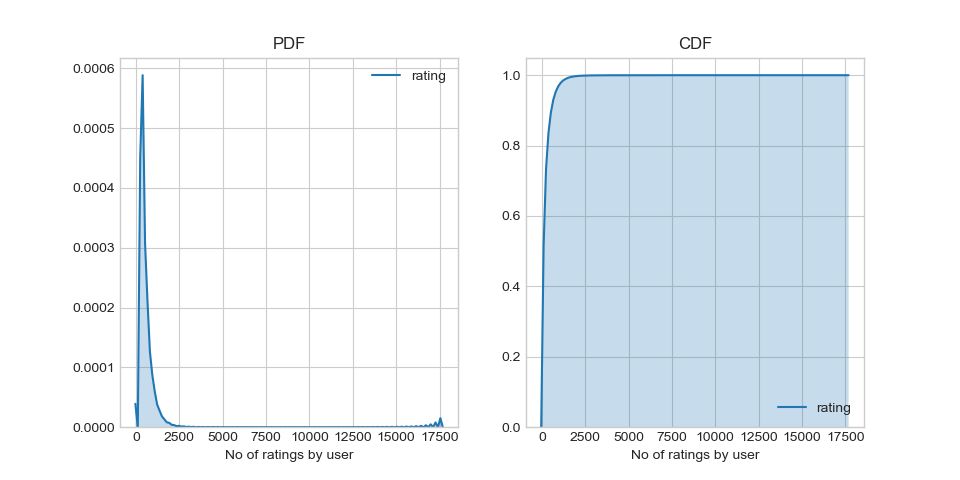

In [18]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [19]:
no_of_rated_movies_per_user.describe()

count    480189.000000
mean        209.249983
std         302.336332
min           1.000000
25%          39.000000
50%          96.000000
75%         259.000000
max       17653.000000
Name: rating, dtype: float64

In [20]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<IPython.core.display.Javascript object>


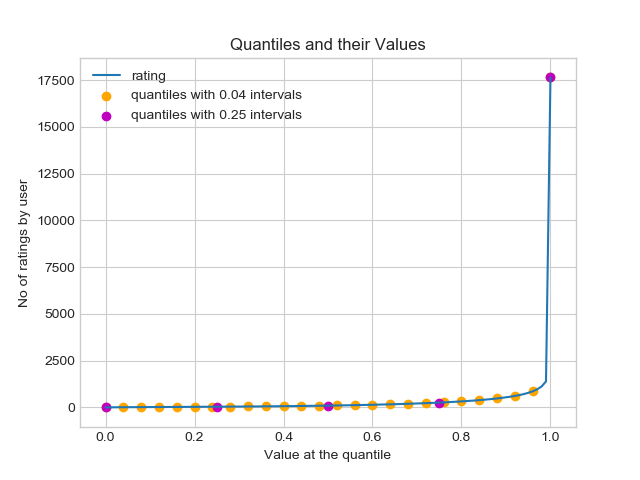

In [148]:
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.04 difference
plt.scatter(x=quantiles.index[::4], y=quantiles.values[::4], c='orange', label="quantiles with 0.04 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

__ Let's look at the ratings at last 10% __?? 

In [22]:
quantiles.values[-10:]

array([  575,   614,   660,   713,   779,   859,   966,  1117,  1390,
       17653], dtype=int64)

In [23]:
no_of_rated_movies_per_user.shape

(480189,)

__how many ratings at the last 1% of all ratings__??

In [24]:
sum(no_of_rated_movies_per_user>= 1390)

4811

__# of ratings that are LESS_THAN_600__

In [25]:
sum(no_of_rated_movies_per_user<=600)

440106

<IPython.core.display.Javascript object>


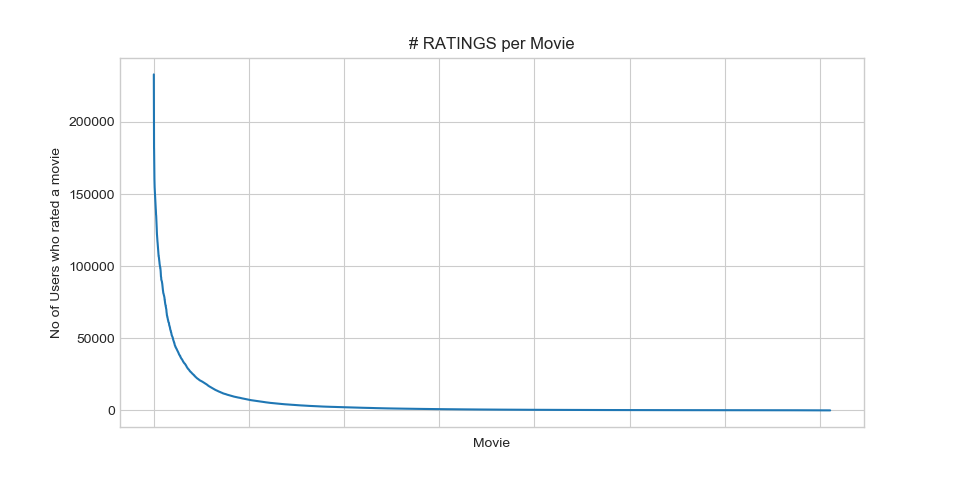

In [26]:
no_of_ratings_per_movie = train_df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

<IPython.core.display.Javascript object>


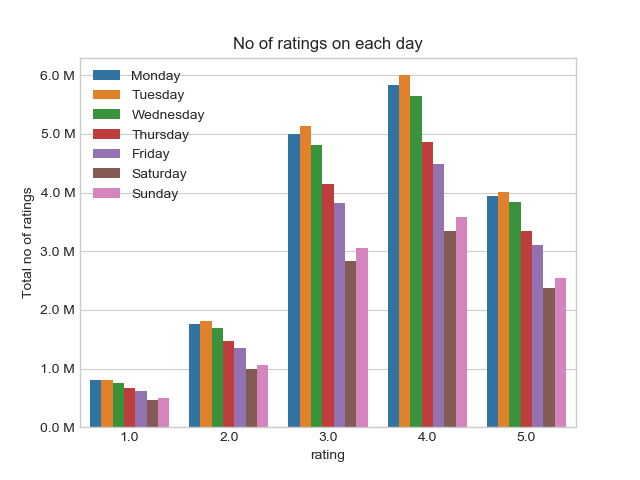

In [27]:
fig, ax = plt.subplots()

sns.countplot(x='rating', data=train_df, hue='day_of_week', 
              hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday',
                         'Saturday', 'Sunday'])
plt.title('No of ratings on each day')
plt.ylabel('Total no of ratings')
plt.legend(loc='upper left')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<IPython.core.display.Javascript object>


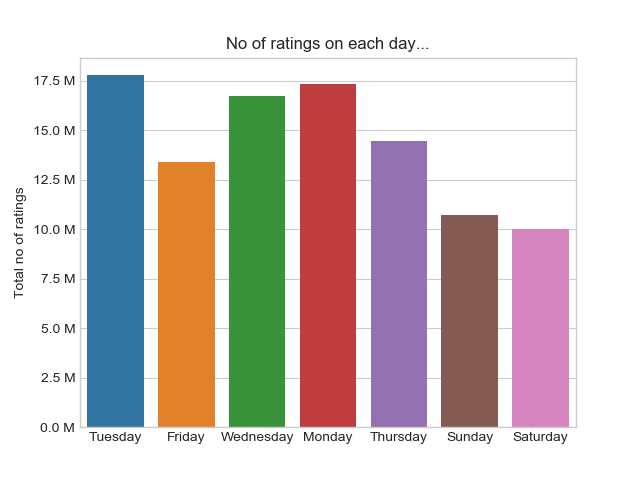

In [28]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<IPython.core.display.Javascript object>


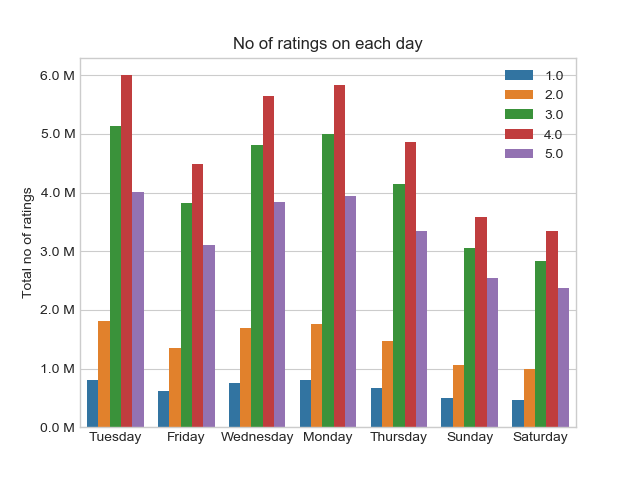

In [29]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, hue='rating', ax=ax)
plt.title('No of ratings on each day')
plt.ylabel('Total no of ratings')
plt.xlabel('')
plt.legend(loc='best')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<IPython.core.display.Javascript object>


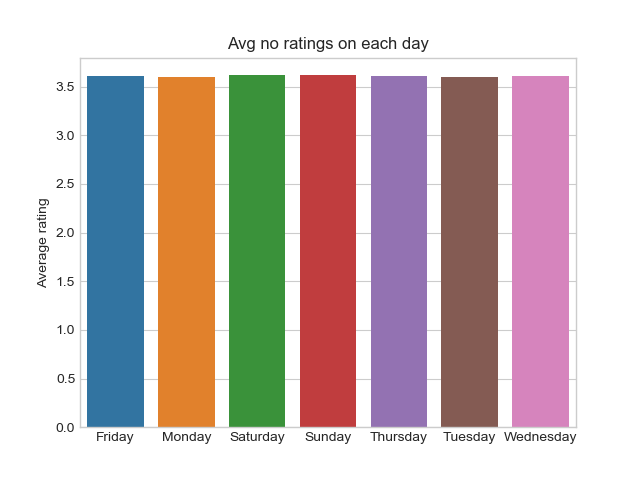

In [30]:
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
sns.barplot(x=avg_week_df.index, y=avg_week_df.values)
plt.title('Avg no ratings on each day')
plt.ylabel('Average rating')
plt.xlabel('')
plt.show()

---------------
# 2. Creating sparse matrix for user-movie-rating from dataframe 
-----------------

In [31]:
import os
from scipy import sparse

if os.path.isfile('sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sparse_matrix = sparse.load_npz('sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    sparse_matrix = sparse.csr_matrix((train_df.rating.tolist(), (train_df.user.tolist(),
                                               train_df.movie.tolist())), 
                           shape=(max(train_df.user)+1,max(train_df.movie)+1))
    print('Done. It\'s shape is : (user, movie) : ',sparse_matrix.shape)

It is present in your pwd, getting it from disk....
DONE..


## PDF's & CDF's of Avg.Ratings of Users & Movies

In [32]:
# u : row indices(userIds) that has an entry(rating to some movie)
# m : column indices(movieIds) that has an entry(rated by some user)
#  One entry from both (x and y) is a non-zero entry....
u,m = sparse_matrix.nonzero()


# ".A1" is for converting Column matrix to 1-D numpy array 
sum_of_ratings_per_user = sparse_matrix.sum(axis=1).A1
# no of ratings that each user has given.
no_ratings_per_user = sparse_matrix.getnnz(axis=1)


# sum of the ratings that a movie got by any user(who rated that movie..)
sum_of_ratings_per_movie = sparse_matrix.sum(axis=0).A1
# no of ratings that a movie got.
no_ratings_per_movie = sparse_matrix.getnnz(axis=0)

# calculate AVERAGE Rating w.r.t user and movie.
avg_rating_per_movie = np.divide(sum_of_ratings_per_movie, no_ratings_per_movie, where=no_ratings_per_movie!=0)
avg_rating_per_user  = np.divide(sum_of_ratings_per_user, no_ratings_per_user, where=no_ratings_per_user!=0)

# We don't get empty columns(movies), but We have empty rows(users),
# Because all movies are from 1 to 2,649,430. But users are selected at random...
avg_rating_per_user = avg_rating_per_user[avg_rating_per_user!=0]

<IPython.core.display.Javascript object>


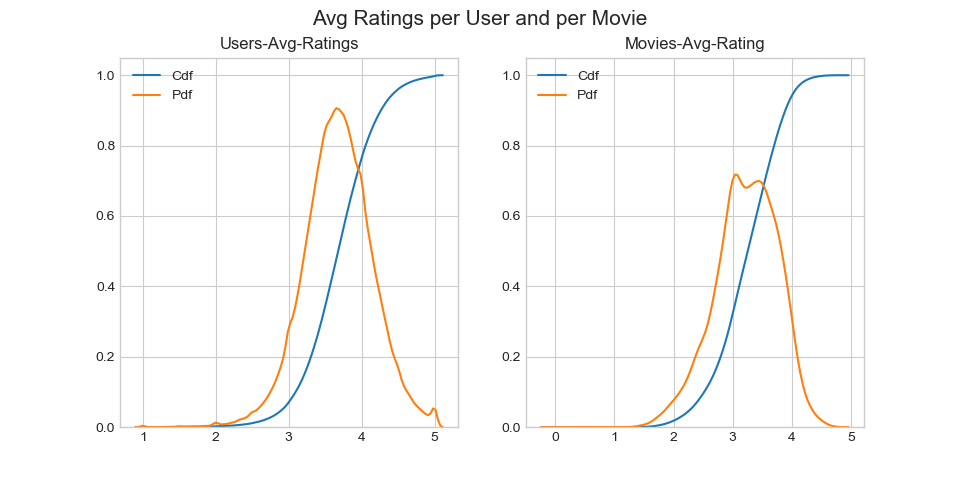

In [33]:
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

# print('plotting cdf of user')
ax1.set_title('Users-Avg-Ratings')
sns.distplot(avg_rating_per_user, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
# print('plotting pdf of user')
sns.distplot(avg_rating_per_user, ax=ax1, hist=False,label='Pdf')

# print('plotting cdf of movie')
ax2.set_title('Movies-Avg-Rating')
sns.distplot(avg_rating_per_movie, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
# print('plotting pdf of movie')
sns.distplot(avg_rating_per_movie, ax=ax2, hist=False, label='Pdf')

plt.show()

----------------------------------------

# 3.1 Computing Similarity matrices

---------------

## 3.1.1 Computing User-User Similarity matrix

1. Calculating User User Similarity_Matrix is not possible because of **2.6 M * 2.6 M** dimensions...

    * It is better to calculate them on the fly ( whenever required and store them without the need of re computing them again when its necessary...
    * You can try If you want to. Your system will crash or Program stops with **Memory Error**

#### But, Let's just try...

In [34]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
import numpy as np

def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 5,
                            draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top",top,"similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:50] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data
    
    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken      

Computing top 1000 similarities for each user..
computing done for 10 users [  time elapsed : 0:00:44.976015  ]
computing done for 20 users [  time elapsed : 0:01:28.553791  ]
computing done for 30 users [  time elapsed : 0:02:12.257140  ]
computing done for 40 users [  time elapsed : 0:02:56.619707  ]
computing done for 50 users [  time elapsed : 0:03:41.308189  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


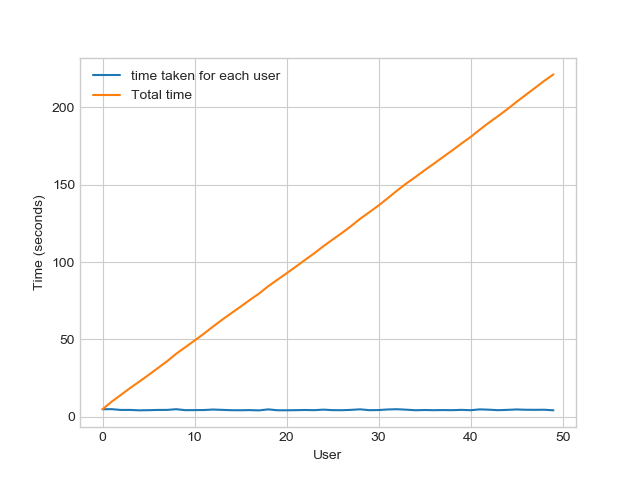

----------------------------------------------------------------------------------------------------
Time taken : 0:03:51.113315


In [35]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(sparse_matrix, compute_for_few=True, top = 1000,
                                                     verbose=True, verb_for_n_rows=10)
print("-"*100)
print("Time taken :",datetime.now()-start)

###  Using TruncatedSVD for dimensionality reduction of user vector


* We have around **480K users** and computing similarities between them..( **17K dimensional vector..**) is time consuming..


* Instead we will reduce the dimension of Movie and then we can compute the similarities between them. 

In [36]:
from sklearn.decomposition import TruncatedSVD

# initilaize the algorithm with some parameters..
# All of them are default except n_components. n_itr is for Randomized SVD solver.
netflix_svd = TruncatedSVD(n_components=500, algorithm='randomized', random_state=15)

In [37]:
from datetime import datetime

start = datetime.now()
trunc_matrix = netflix_svd.fit_transform(sparse_matrix)
print(datetime.now()-start)

0:18:47.619762


Here,


- $\sum \longleftarrow$ (netflix\_svd.**singular\_values\_** )


- $\bigvee^T \longleftarrow$ (netflix\_svd.**components_**)


- $\bigcup$ is not returned. instead **Projection_of_X** onto the new vectorspace is returned. 


- It uses **randomized svd** internally, which returns **All 3 of them saperately**. Use that instead.. 

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
expl_var = np.cumsum(netflix_svd.explained_variance_ratio_)

<IPython.core.display.Javascript object>


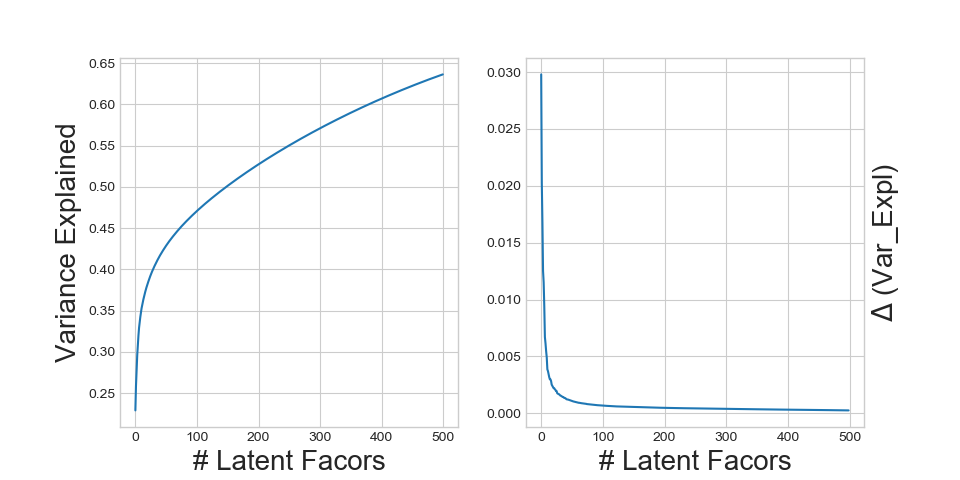

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))

ax1.set_ylabel("Variance Explained", fontsize=20)
ax1.set_xlabel("# Latent Facors", fontsize=20)
ax1.plot(expl_var)

ax2.plot([expl_var[i+1] - expl_var[i] for i in range(len(expl_var)-1)])
ax2.set_ylabel("$\Delta$ (Var_Expl)", fontsize=20)
ax2.yaxis.set_label_position("right")
ax2.set_xlabel("# Latent Facors", fontsize=20)

plt.show()


** I think 500 dimensions is good enough *** 
--
---------

In [41]:
# Let's project our Original U_M matrix into into 500 Dimensional space...
start = datetime.now()
trunc_matrix = sparse_matrix.dot(netflix_svd.components_.T)
print(datetime.now()- start)

0:00:28.286045


In [42]:
type(trunc_matrix), trunc_matrix.shape

(numpy.ndarray, (2649430, 500))

* Let's convert this to actual sparse matrix and store it for future purposes

In [43]:
if not os.path.isfile('trunc_sparse_matrix.npz'):
    # create that sparse sparse matrix
    trunc_sparse_matrix = sparse.csr_matrix(trunc_matrix)
    # Save this truncated sparse matrix for later usage..
    sparse.save_npz('trunc_sparse_matrix', trunc_sparse_matrix)
else:
    trunc_sparse_matrix = sparse.load_npz('trunc_sparse_matrix.npz')

In [44]:
trunc_sparse_matrix.shape

(2649430, 500)

Computing top 100 similarities for each user..
computing done for 5 users [  time elapsed : 0:00:41.020679  ]
computing done for 10 users [  time elapsed : 0:01:21.802623  ]
computing done for 15 users [  time elapsed : 0:02:02.342095  ]
computing done for 20 users [  time elapsed : 0:02:42.614251  ]
computing done for 25 users [  time elapsed : 0:03:23.275610  ]
computing done for 30 users [  time elapsed : 0:04:03.844629  ]
computing done for 35 users [  time elapsed : 0:04:44.427240  ]
computing done for 40 users [  time elapsed : 0:05:25.095659  ]
computing done for 45 users [  time elapsed : 0:06:05.632880  ]
computing done for 50 users [  time elapsed : 0:06:46.013593  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


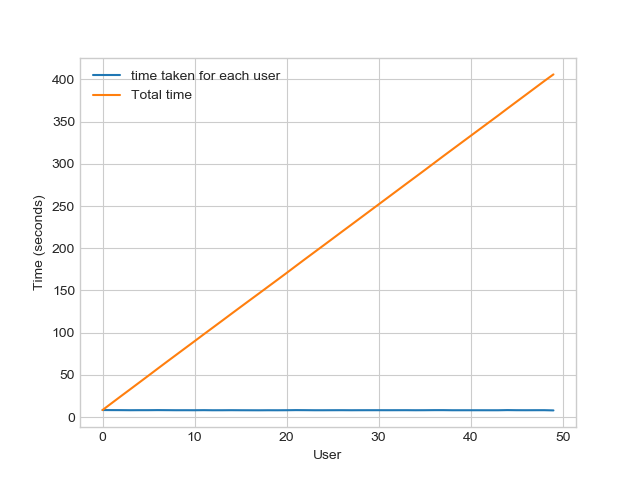

--------------------------------------------------
time: 0:07:08.364128


In [45]:
start = datetime.now()
trunc_u_u_sim_matrix, _ = compute_user_similarity(trunc_sparse_matrix, compute_for_few=True, top=100, verbose=True, 
                                                 verb_for_n_rows=5)
print("-"*50)
print("time:",datetime.now()-start)

**: This is taking more time for each user than Original one.**

- ### Why did this happen...??


    - Just think about it. It's not that difficult.

---------------------------------___( SPARSE & DENSE..................get it ?? )___-----------------------------------

* ### Is there any other way to compute user user similarity..??

- The only way I can think of right now is to compute similar users for a perticular user, is to do it whnenver required(**ie., Run time**)
    - We maintain a binary Vector for users, which tells us whether we already computed or not..
    - ***If not*** : 
        - Compute top (let's just say, 1000) most similar users for this given user, and add this to our datastructure, so that we can just access it(similar users) without recomputing it again.
        - 
    - ***If It is already Computed***:
        - Just get it directly from our datastructure, which has that information.
        - In production time, We might have to recompute similarities, if it is computed a long time ago. Because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ). 
        - 
    - ***Which datastructure to use:***
        - It is purely implementation dependant. 
        - One simple method is to maintain a **Dictionary Of Dictionaries**.
            - 
            - **key    :** _userid_ 
            - __value__: _Again a dictionary_
                - __key__  : _Similar User_
                - __value__: _Similarity Value_

## 3.1.2 Computing Movie-Movie similarity matrix

In [46]:
from datetime import datetime
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
import os
from scipy import sparse
from datetime import datetime

if not os.path.isfile('m_m_sim_sparse.npz'):
    print("It is not present offline. So, computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=sparse_matrix.T, dense_output=False)
    # store this sparse matrix in disk before using it. For future purposes.
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
    print(datetime.now()-start)
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("m_m_sim_sparse.npz")


It is there, We will get it.


In [48]:
m_m_sim_sparse.shape

(17771, 17771)

## Does Simalarity really works as the way we expected...? 

__Let's pick some random movie and check for its similar movies....__

In [73]:
# First Let's load the movie details into soe dataframe..
# movie details are in 'netflix/movie_titles.csv'

movie_titles = pd.read_csv("netflix/movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")

movie_titles.head()

,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


Similar Movies for __movie_id : 59 ( Vampire movie)
--

In [200]:
mv_id = 67

In [212]:
print("\nMovie ----->",movie_titles.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} similar movies and we will get only most similar ones..".format(m_m_sim_sparse[:,mv_id].getnnz()))


Movie -----> Vampire Journals

It has 289 Ratings from users.

We have 17747 similar movies and we will get only most similar ones..


In [213]:
similarities = m_m_sim_sparse[mv_id].toarray().ravel()

similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(movie_ids)

<IPython.core.display.Javascript object>


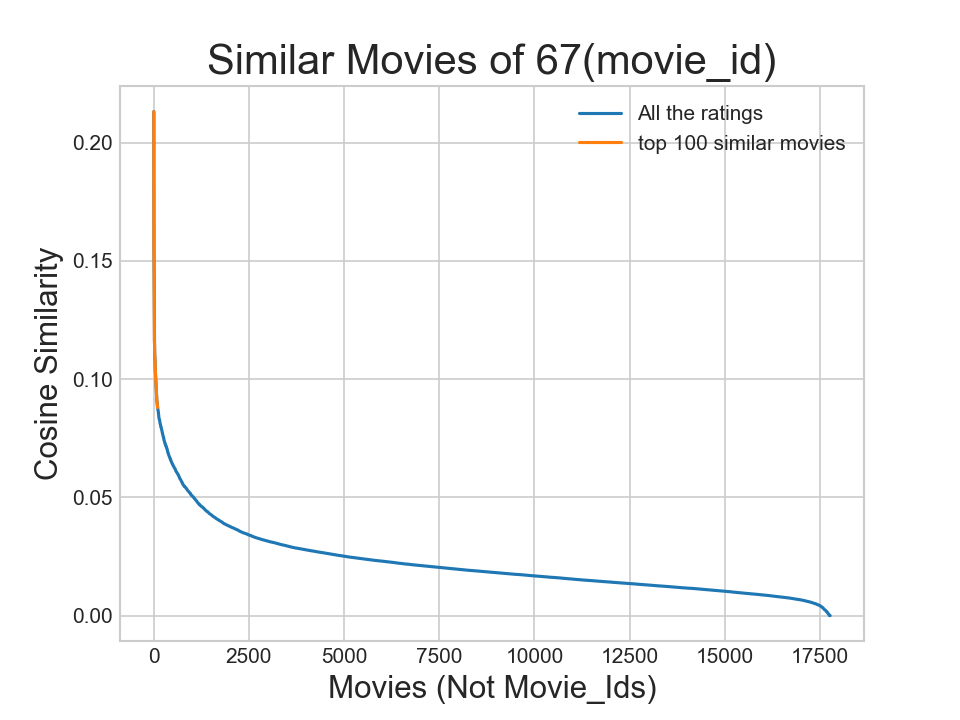

In [313]:
plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

### Top 10 similar movies....

In [210]:
movie_titles.loc[sim_indices[:10]]

,year_of_release,title
movie_id,,
323,1999.0,Modern Vampires
4044,1998.0,Subspecies 4: Bloodstorm
1688,1993.0,To Sleep With a Vampire
4667,1996.0,Vampirella
13962,2001.0,Dracula: The Dark Prince
12053,1993.0,Dracula Rising
16279,2002.0,Vampires: Los Muertos
13873,2001.0,The Breed
1900,1997.0,Club Vampire


 > Similarly, we can ___find similar users___ and compare how similar they are. 

# Building some simple model

- We will build a simple model whuch uses the similarity measures.


- It is ___worse than___ any of the basic prediction algorithms. (__not even THE BASELINE MODEL__)


- It is just to show that, How we can use __similarity matrices__ while recommending OR predicting the user's rating/interest in some perticular movie/item.

- Our probetxt format is
    - __movie_id__:
        - user_id
        - user_id
        - user_id
        - .....
        - ....
    - __movie_id__:
        - user_id
        - user_id
        - ......
        - .....
    - __...........__
        - ......
        - ......

- We will read the test data (__probe.txt__) directly from the file and predict the rating without explicitely storing test file. 

## 1. Using MOVIE_MOVIE similarity

In [547]:
user, movie = 30878, 1

__Algorithm__:

 $\Large \hat r_{ui} = \frac{\text { Global Average Rating } + \frac {\sum (\text{User Ratings of similar movies})} {\text {No of ratings }}} {2} $

In [548]:
temp1 = m_m_sim_sparse[movie].toarray().ravel()

C:\Users\Varma\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


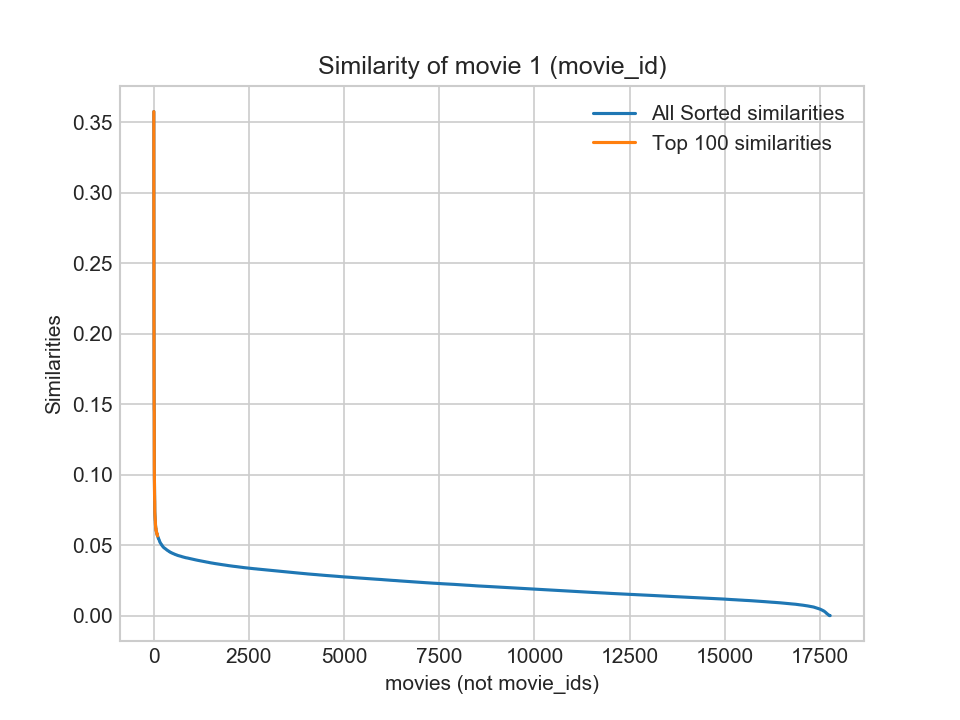

In [549]:
plt.title("Similarity of movie 1 (movie_id)")
plt.xlabel("movies (not movie_ids)")
plt.ylabel("Similarities")
plt.plot(temp1[temp1.argsort()[::-1][1:]], label = "All Sorted similarities")
plt.plot(temp1[temp1.argsort()[::-1][1:100]], label = "Top 100 similarities")
plt.legend(loc="best")
plt.show()

> It is Okay to take ___TOP 100___ similarities while predicting the user rating

- But, we will just take __top_20__ similar movies. Because
    
    - For dissimilar movies, the ___distribution of ratings___ may be ___different___
    
    - They might ___bring down___ the ___actual average rating of similar movies___..

In [544]:
def average_of_top_similar(similarities, ratings, top=100, verbose=False):
    # get all similarities into an numpy array.
    sims = similarities.toarray().ravel() if sparse.issparse(similarities) else similarities
    # get the top similar users or items, we don't care about those values...
    top_users_or_movies = np.argsort(sims)[::-1][1:top+1] # we are ignoring the movie/user itself..
    
    top_ratings = ratings.toarray().ravel() if sparse.issparse(ratings) else ratings
    if verbose:
        print(sum(top_ratings[top_users_or_movies] != 0))
        print(sum(top_ratings[top_users_or_movies]))
        print(len(top_users_or_movies))
    # return the average rating of top ''top'' users or movies
    return sum(top_ratings[top_users_or_movies]) / (sum(top_ratings[top_users_or_movies]!=0))

In [448]:
average_of_top_similar(similarities= m_m_sim_sparse[movie],
                      ratings = sparse_matrix[user,:], top=100, verbose=True)

16
64.0
100


4.0

__Let's read the probe.txt file from file and Predict the ratings and RMSE __

In [246]:
# First Let's findout the Total_Average_ratings of the user...
global_AVG_rating = sparse_matrix.sum()/sparse_matrix.count_nonzero()
global_AVG_rating

3.6043566842540935

In [545]:
start = datetime.now()

m_m_actual_ratings = list()
m_m_predicted_ratings = list()
# to print the progress...
verbose = True

# read from file one by one 
with open("netflix/probe.txt") as probe:
    count = 0
    for line in probe:
        count = count + 1
        line = line.strip()
        if line.endswith(':'): # ie., it means it is movie id
            movie_id = int(line.replace(':',''))
        else:
            # it contains userId...
            user_id = int(line)
        
        # All the entries in probe.txt file are not in given ratings...
        # So , we will ignore the prediction of such ratings. Because,
        # the effect of such predictions will effect RMSE.
        if sparse_matrix[user_id, movie_id] == 0:
            continue
        
        # Predict the rating for this movie by user using MOVIE_MOVIE_SIMILARITY
        avg_rating_of_similar_movies = average_of_top_similar(similarities=m_m_sim_sparse[movie_id],
                                                             ratings=sparse_matrix[user_id, :],
                                                             top = 10)
        if np.isnan(avg_rating_of_similar_movies):
            #  User haven't rated any movies of this kind (top 100 similar movies..)
            #  So, just make this rating as global average rating.. :)
            predicted_rating = global_AVG_rating
        else:
            predicted_rating = np.mean([avg_rating_of_similar_movies, global_AVG_rating])
        
        # add it to the lists
        m_m_actual_ratings.append(sparse_matrix[user_id, movie_id])
        m_m_predicted_ratings.append(predicted_rating)
        
        if verbose:
            if count % 10000 == 0:
                print("Done for",count," users. Time elapsed : ", datetime.now()-start)
        if count % 10000 == 0:
            # We can skip furthur predictions for now...
            break
        
        # print(sparse_matrix[user_id, movie_id],":",predicted_rating)

print("No of Predicted Ratings :", count)

print("time : ", datetime.now()- start)

C:\Users\Varma\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


Done for 10000  users. Time elapsed :  0:00:14.542054
No of Predicted Ratings : 10000
time :  0:00:14.546055


In [472]:
len(m_m_predicted_ratings), len(m_m_actual_ratings)

(9788, 9788)

In [515]:
m_m_errors = np.array([abs(m_m_predicted_ratings[i] - m_m_actual_ratings[i]) for i in range(len(m_m_actual_ratings))])

C:\Users\Varma\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


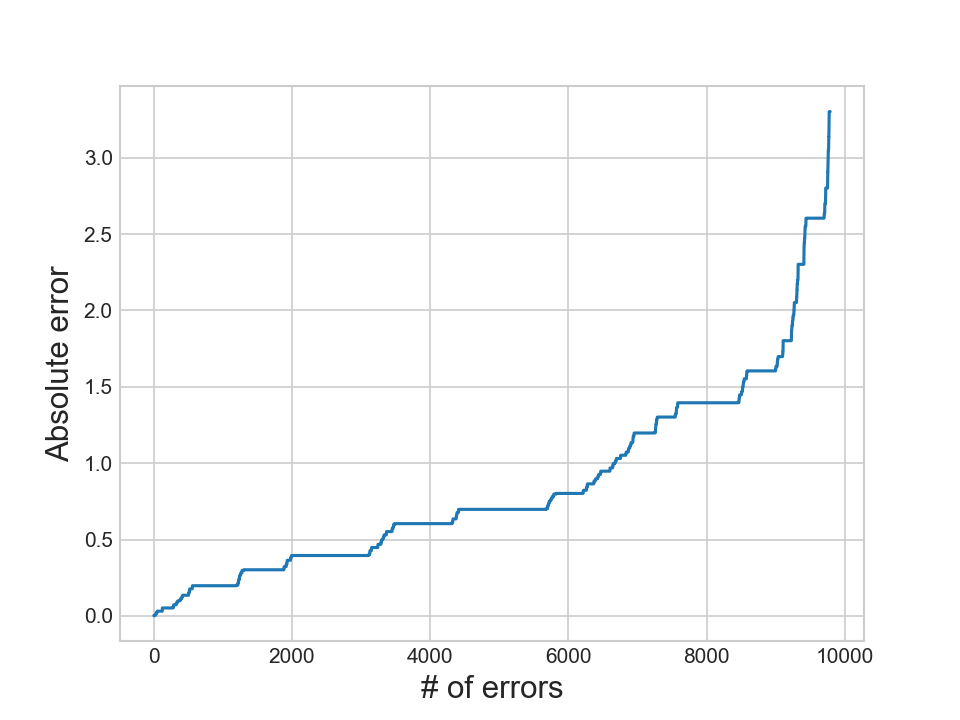

In [543]:
m_m_errors = np.array([abs(m_m_predicted_ratings[i] - m_m_actual_ratings[i]) for i in range(len(m_m_actual_ratings))])

plt.plot(m_m_errors[m_m_errors.argsort()])
plt.xlabel('# of errors', fontsize=15)
plt.ylabel("Absolute error", fontsize=15)
plt.show()

## 2. Using USER_USER Similarities 

__Algorithm__:

 $\Large \hat r_{ui} = \frac{\text { Global Average Rating } + \frac {\sum (\text{Ratings of this movie_i by similar users of user_u})} {\text {No of ratings }}} {2} $

In [546]:
global_AVG_rating

3.6043566842540935

In [570]:
temp = cosine_similarity(sparse_matrix[user], sparse_matrix, dense_output=False).toarray().ravel()

C:\Users\Varma\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


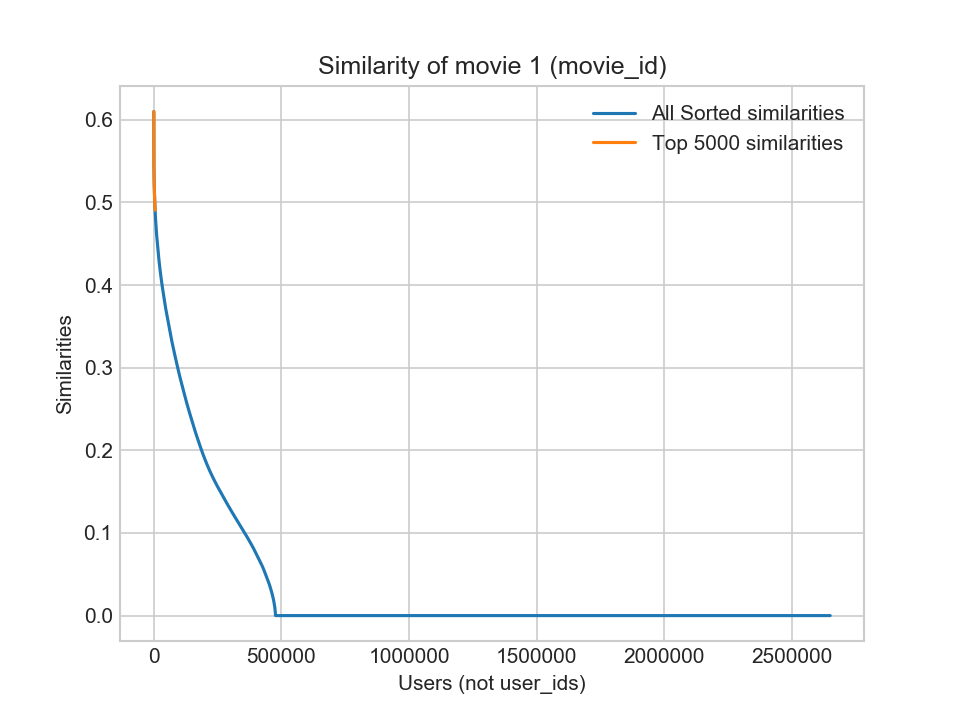

In [572]:
plt.title("Similarity of movie 1 (movie_id)")
plt.xlabel("Users (not user_ids)")
plt.ylabel("Similarities")
plt.plot(temp[temp.argsort()[::-1][1:]], label = "All Sorted similarities")
plt.plot(temp[temp.argsort()[::-1][1:5000]], label = "Top 5000 similarities")
plt.legend(loc="best")
plt.show()

In [573]:
# Since we don't have a similarity matrix of users, we have to compute now and pass it whenever necessary...
average_of_top_similar(similarities = cosine_similarity(sparse_matrix[user], sparse_matrix, dense_output=False),
                      ratings = sparse_matrix[:, movie], verbose=True, top=5000)

34
130.0
5000


3.823529411764706

In [575]:
global_AVG_rating

3.6043566842540935

In [579]:
# Since we don't have a similarity matrix of users, we have to compute now and pass it whenever necessary...
average_of_top_similar(similarities = cosine_similarity(sparse_matrix[user], sparse_matrix, dense_output=False),
                      ratings = sparse_matrix[:, 2], verbose=True, top=5000)

1
2.0
5000


2.0

- #### The problem with finding User_User similarities whenever required is:

    - It takes __5 seconds__ for each user to find out average ratings
    - We might have to __recompute the similar_users__ for an user_u, if we have __more than one rating predictions__ for him/her.


- __Solution :__

    - We will maintain a datastructure which stores the TOP_SIMILAR_USERS_FOR_AN_USER which stores the similarities.
    
    - So, we don't have to re compute it again, if we already done once.

    - It will save lots of time while predicting the ratings..

- Our datastructure is **Dictionary Of Dictionaries**.
    - 
    - **key    :** _userid_ 
    - __value__: _List of tuples_ ( we want to maintain the ___order of the tuples(similar users too)___)
        - __first_value__  :  _Similar User_
        - __second_value__:  _Rating_

In [610]:
# create a dictionary for this
u_u_similarity_dict = dict()

In [612]:
u_u_similarity_dict

{}

In [596]:
# WE will also maintain boolean array, that tells us whether we already computed it or not.
# It is easier than __checking for key__ everytime in the __dictionary__.

u_u_computed_or_not = np.zeros((sparse_matrix.shape[0],), dtype=bool)

In [599]:
u_u_computed_or_not[user]

False

def average_of_top_similar(similarities, ratings, top=100, verbose=False):
    # get all similarities into an numpy array.
    sims = similarities.toarray().ravel() if sparse.issparse(similarities) else similarities
    # get the top similar users or items, we don't care about those values...
    top_users_or_movies = np.argsort(sims)[::-1][1:top+1] # we are ignoring the movie/user itself..
    
    top_ratings = ratings.toarray().ravel() if sparse.issparse(ratings) else ratings
    if verbose:
        print(sum(top_ratings[top_users_or_movies] != 0))
        print(sum(top_ratings[top_users_or_movies]))
        print(len(top_users_or_movies))
    # return the average rating of top ''top'' users or movies
    return sum(top_ratings[top_users_or_movies]) / (sum(top_ratings[top_users_or_movies]!=0))

In [629]:
def get_top_similar_users_ratings(similarities, ratings, top = 500, verbose=False):
    # we will return 'top_avg_rating' and 'list of tuples (sim_user, his/her_rating)'
    sims = similarities.toarray().ravel() if sparse.issparse(similarities) else similarities

    top_similar_users = np.argsort(sims)[::-1][1:top+1]
    top_ratings = ratings.toarray().ravel() if sparse.issparse(ratings) else ratings
    
    # calculate average rating of top similar users
    avg_rat = sum(top_ratings[top_similar_users])/(sum(top_ratings[top_similar_users] != 0))
    if verbose:
        print(sum(top_ratings[top_similar_users] != 0))
        print(sum(top_ratings[top_similar_users]))
        print(len(top_similar_users))
    # forl list of tuples
    sim_list = [(user, top_ratings[user]) for user in top_similar_users if top_ratings[user] !=0 ]
    
    return sim_list, avg_rat

In [623]:
temp = cosine_similarity(sparse_matrix[user], sparse_matrix, dense_output=False)

In [630]:
get_top_similar_users_ratings(temp, sparse_matrix[:, movie], top=1000, verbose=True)

13
48.0
1000


([(1981464, 4.0),
  (544833, 3.0),
  (1488844, 3.0),
  (642036, 3.0),
  (1346257, 3.0),
  (1922925, 4.0),
  (1117062, 4.0),
  (1751103, 4.0),
  (1558286, 3.0),
  (369646, 5.0),
  (890669, 4.0),
  (758850, 4.0),
  (2226525, 4.0)],
 3.6923076923076925)

In [581]:
start = datetime.now()

u_u_actual_ratings = list()
u_u_predicted_ratings = list()
# to print the progress...
verbose = True

# read from file one by one 
with open("netflix/probe.txt") as probe:
    count = 0
    for line in probe:
        count = count + 1
        line = line.strip()
        if line.endswith(':'): # ie., it means it is movie id
            movie_id = int(line.replace(':',''))
        else:
            # it contains userId...
            user_id = int(line)
        
        # All the entries in probe.txt file are not in given ratings...
        # So , we will ignore the prediction of such ratings. Because,
        # the effect of such predictions will effect RMSE.
        if sparse_matrix[user_id, movie_id] == 0:
            continue
        # first, let's find out similarities, since we don't have one
        similar_user_sims = cosine_similarity(sparse_matrix[user_id], sparse_matrix, dense_output=False)
        
        # Predict the rating for this movie by user using MOVIE_MOVIE_SIMILARITY
        # ratings : Ratings of THE MOVIE by all users 
        avg_rating_of_similar_movies = average_of_top_similar(similarities = similar_user_sims,
                      ratings = sparse_matrix[:, movie_id], verbose=True, top=5000)
        if np.isnan(avg_rating_of_similar_movies):
            #  User haven't rated any movies of this kind (top 100 similar movies..)
            #  So, just make this rating as global average rating.. :)
            predicted_rating = global_AVG_rating
        else:
            predicted_rating = np.mean([avg_rating_of_similar_movies, global_AVG_rating])
        
        # add it to the lists
        u_u_actual_ratings.append(sparse_matrix[user_id, movie_id])
        u_u_predicted_ratings.append(predicted_rating)
        
        if verbose:
            if count % 1 == 0:
                print("Done for",count," users. Time elapsed : ", datetime.now()-start)
        if count % 10 == 0:
            # We can skip furthur predictions for now...
            break
        
        # print(sparse_matrix[user_id, movie_id],":",predicted_rating)

print("No of Predicted Ratings :", count)

print("time : ", datetime.now()- start)

34
130.0
5000
Done for 1  users. Time elapsed :  0:00:05.209344
34
130.0
5000
Done for 2  users. Time elapsed :  0:00:10.414690
13
53.0
5000
Done for 3  users. Time elapsed :  0:00:15.496001
12
48.0
5000
Done for 4  users. Time elapsed :  0:00:20.049177
6
21.0
5000
Done for 5  users. Time elapsed :  0:00:24.730878
11
42.0
5000
Done for 6  users. Time elapsed :  0:00:29.180026
31
124.0
5000
Done for 7  users. Time elapsed :  0:00:33.606257
74
315.0
5000
Done for 8  users. Time elapsed :  0:00:37.935377
22
81.0
5000
Done for 9  users. Time elapsed :  0:00:42.980679
0
0.0
5000
Done for 10  users. Time elapsed :  0:00:47.369813
No of Predicted Ratings : 10
time :  0:00:47.369813


C:\Users\Varma\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [586]:
u_u_actual_ratings, u_u_predicted_ratings

([4.0, 4.0, 4.0, 3.0, 5.0, 5.0, 4.0, 4.0, 4.0, 3.0],
 [3.7139430480093996,
  3.7139430480093996,
  3.840639880588585,
  3.8021783421270468,
  3.5521783421270468,
  3.711269251217956,
  3.8021783421270468,
  3.9305567205054253,
  3.6430874330361376,
  3.6043566842540935])

C:\Users\Varma\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


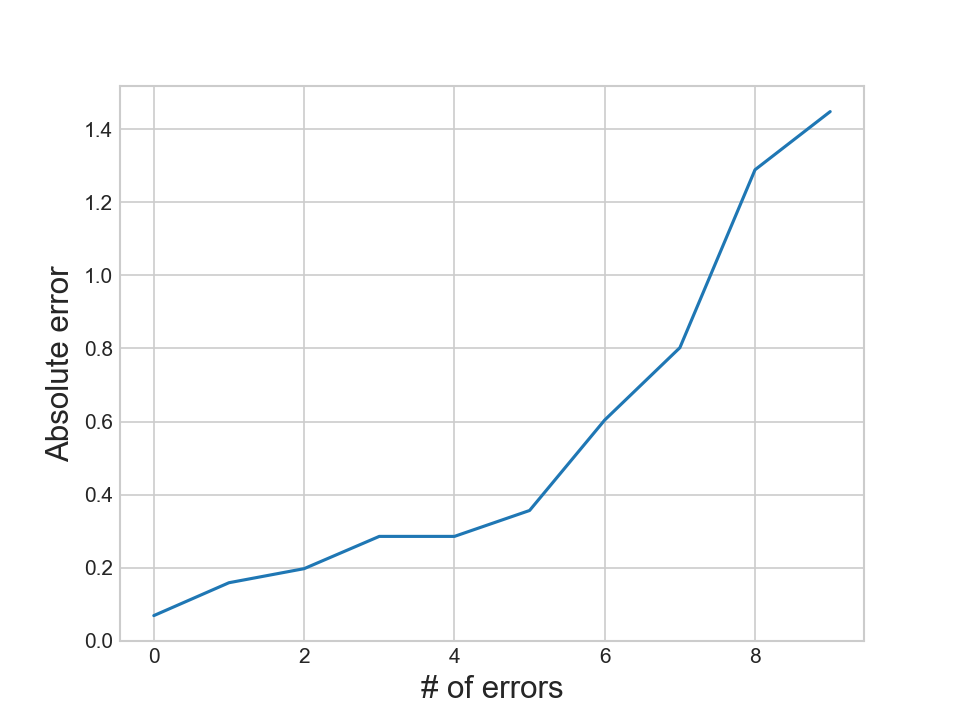

In [587]:
u_u_errors = np.array([abs(u_u_predicted_ratings[i] - u_u_actual_ratings[i]) for i in range(len(u_u_actual_ratings))])

plt.plot(u_u_errors[u_u_errors.argsort()])
plt.xlabel('# of errors', fontsize=15)
plt.ylabel("Absolute error", fontsize=15)
plt.show()

In [49]:
print("-"*100)
print("Total time taken to run this entire notebook ( with saved files) is :",datetime.now()-globalstart)

----------------------------------------------------------------------------------------------------
Total time taken to run this entire notebook ( with saved files) is : 0:42:08.302761
